In [1]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [3]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# Missing values

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Revenue             0
dtype: int64

In [5]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
country_to_continent = {
    'United Kingdom': 'United Kingdom',
    'France': 'Europe',
    'Australia': 'Rest of World',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Bahrain': 'Asia',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Czech Republic': 'Europe',
    'Canada': 'Rest of World',
    'Unspecified': 'Rest of World',
    'Brazil': 'Rest of World',
    'USA': 'Rest of World',
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Rest of World'
}

In [7]:
# creating of new column => Continent

df['Continent'] = df['Country'].map(country_to_continent)

In [8]:
df['CustomerID'] = df['CustomerID'].fillna(df['Country'])

In [9]:
df.groupby('Continent')['Country'].nunique()

Continent
Asia               8
Europe            23
Rest of World      6
United Kingdom     1
Name: Country, dtype: int64

# InvoiceNo

In [10]:
df[df['InvoiceNo'].str[0] == "A"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom,United Kingdom,11062.06,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom,United Kingdom,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom,United Kingdom,-11062.06,United Kingdom


In [11]:
# dataframe without "A"

df_drop = df[df['InvoiceNo'].str[0] != "A"]

In [12]:
# dataframe with just cancelations

df_cancel = df_drop[df_drop['InvoiceNo'].str[0] == "C"]

In [13]:
# dataframe without cancelations

df_rest = df_drop[df_drop['InvoiceNo'].str[0] != "C"]

In [14]:
df_rest.sort_values(by='InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,Europe
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Europe
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00,Europe


# Unit price

In [15]:
df.groupby('UnitPrice')['UnitPrice'].count().head(10)

UnitPrice
-11062.060       2
 0.000        2515
 0.001           4
 0.010           1
 0.030           3
 0.040          66
 0.060         117
 0.070           9
 0.080          56
 0.090           2
Name: UnitPrice, dtype: int64

In [16]:
df.groupby('UnitPrice')['UnitPrice'].count().tail(10)

UnitPrice
8142.75     2
8286.22     1
11062.06    1
11586.50    1
13474.79    1
13541.33    3
16453.71    1
16888.02    1
17836.46    1
38970.00    1
Name: UnitPrice, dtype: int64

In [17]:
# most common items with 0 unit price

df[df['UnitPrice'] == 0].groupby('Description')['Description'].count().sort_values(ascending=False).head(10)

Description
check                            159
?                                 47
damages                           45
damaged                           43
found                             25
sold as set on dotcom             20
adjustment                        16
Damaged                           14
Unsaleable, destroyed.             9
FRENCH BLUE METAL DOOR SIGN 1      9
Name: Description, dtype: int64

In [18]:
unit = df_rest.groupby('StockCode')['UnitPrice'].agg(['mean', 'min']).sort_values(by='min')

In [19]:
# items with zero unit price and biggest mean of unit price

unit[unit['min'] == 0].sort_values(by='mean', ascending=False).head(10)

,mean,min
StockCode,,
DOT,290.900945,0.0
M,226.624557,0.0
22827,146.785714,0.0
22656,139.761905,0.0
22655,139.743590,0.0
22823,102.333333,0.0
C2,49.528169,0.0
21769,44.240000,0.0
23064,43.592083,0.0


In [20]:
# selected  item  and its unit price

df[df['StockCode'] == 22655].groupby('UnitPrice')['UnitPrice'].count()

UnitPrice
0.0       1
50.0      2
125.0    36
265.5     1
295.0     7
Name: UnitPrice, dtype: int64

In [21]:
# selected  item  and its unit price

df_rest[df_rest['StockCode'] == 22656].groupby('UnitPrice')['UnitPrice'].count()

UnitPrice
0.0       1
50.0      1
125.0    16
295.0     3
Name: UnitPrice, dtype: int64

# Histograms

## df_orders

In [22]:
# dataframe grouped by orders

df_orders = df_rest.groupby('InvoiceNo').agg({
    'InvoiceNo': 'min',
    'CustomerID': 'min',
    'Revenue': 'sum',
    'InvoiceDate': 'min'
})

In [23]:
# creating of a new column => orders into revenue group

def convert_to_groups(row):
    if row['Revenue'] < 100:
        return "01: <100"
    elif row['Revenue'] < 250:
        return "02: 100-250"
    elif row['Revenue'] < 500:
        return "03: 250-500"
    else:
        return "04: >500"

# Apply conversion function to create 'balances_czk' column
df_orders['orders_group'] = df_orders.apply(convert_to_groups, axis=1)

In [24]:
df_orders.head()

,InvoiceNo,CustomerID,Revenue,InvoiceDate,orders_group
InvoiceNo,,,,,
536365,536365,17850.0,139.12,2010-12-01 08:26:00,02: 100-250
536366,536366,17850.0,22.20,2010-12-01 08:28:00,01: <100
536367,536367,13047.0,278.73,2010-12-01 08:34:00,03: 250-500
536368,536368,13047.0,70.05,2010-12-01 08:34:00,01: <100
536369,536369,13047.0,17.85,2010-12-01 08:35:00,01: <100


In [25]:
df_orders.to_csv('df_orders.csv', index=False)

## df_clients

In [26]:
# dataframe grouped by customers

df_clients = df_orders.groupby('CustomerID').agg({
    'CustomerID': 'min',
    'Revenue': 'sum',
    'InvoiceDate': 'min'
})

In [27]:
# creating of a new column => customers into revenue group

def convert_to_revenue_groups(row):
    if row['Revenue'] < 500:
        return "01: <500"
    elif row['Revenue'] < 1000:
        return "02: 500-1000"
    else:
        return "03: >1000"

# Apply conversion function to create 'balances_czk' column
df_clients['revenue_group'] = df_clients.apply(convert_to_revenue_groups, axis=1)

In [28]:
df_clients.sample(5)

,CustomerID,Revenue,InvoiceDate,revenue_group
CustomerID,,,,
12708.0,12708.0,2712.91,2010-12-06 10:43:00,03: >1000
14603.0,14603.0,660.00,2011-03-10 10:27:00,02: 500-1000
15970.0,15970.0,314.10,2011-02-09 12:08:00,01: <500
16180.0,16180.0,10254.18,2011-04-01 10:23:00,03: >1000
16560.0,16560.0,841.41,2010-12-16 14:36:00,02: 500-1000


In [29]:
df_clients.to_csv('df_clients.csv', index=False)

## Charts

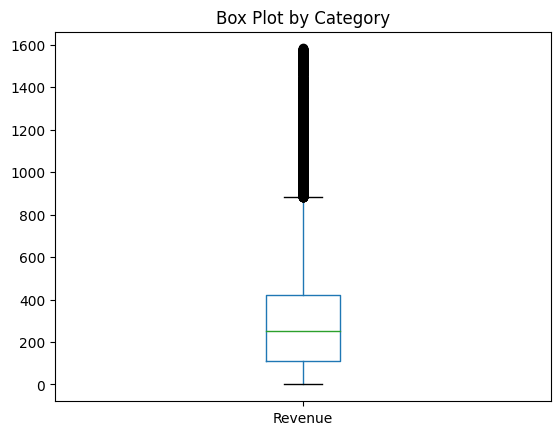

In [30]:
orders = df_orders.sort_values(by='Revenue', ascending=False)[1000:]

orders.boxplot(column='Revenue', grid=False)

# Add labels and title
plt.title('Box Plot by Category')

# Show the plot
plt.show()

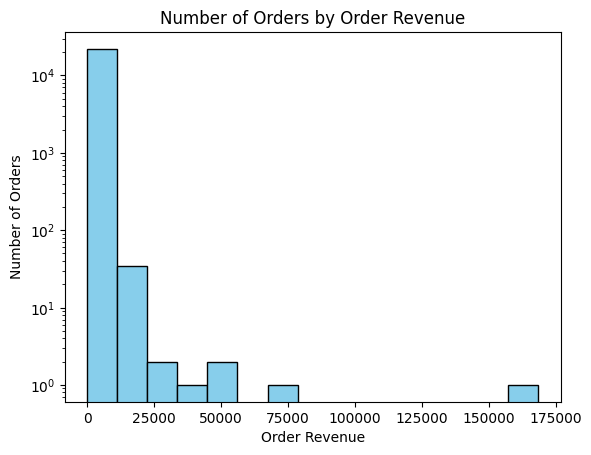

In [31]:
plt.hist(df_orders.Revenue, bins=15, color='skyblue', edgecolor='black')
plt.yscale('log')

# Add labels and title
plt.title("Number of Orders by Order Revenue")
plt.xlabel("Order Revenue")
plt.ylabel("Number of Orders")

# Show the plot
plt.show()

In [32]:
# top clients based on revenue

revenue_per_client = df_orders.groupby("CustomerID")['Revenue'].sum().sort_values(ascending=False)[1:]
revenue_per_client

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
             ...    
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
13256.0         0.00
Name: Revenue, Length: 4347, dtype: float64

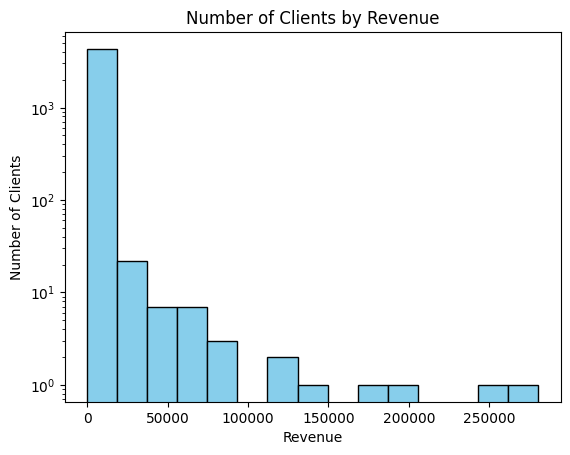

In [33]:
plt.hist(revenue_per_client, bins=15, color='skyblue', edgecolor='black')
plt.yscale('log')

# Add labels and title
plt.title("Number of Clients by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Number of Clients")

# Show the plot
plt.show()

In [34]:
# top clients based on number of orders

orders_per_client = df_orders.groupby("CustomerID")['InvoiceNo'].count().sort_values(ascending=False)[1:]
orders_per_client

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
14357.0      1
14355.0      1
15503.0      1
13419.0      1
12346.0      1
Name: InvoiceNo, Length: 4347, dtype: int64

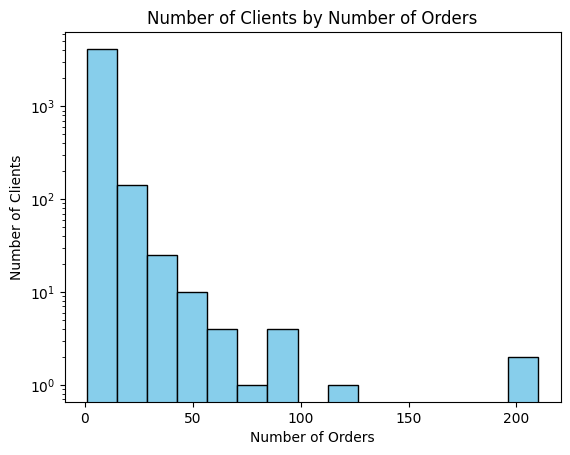

In [35]:
plt.hist(orders_per_client, bins=15, color='skyblue', edgecolor='black')
plt.yscale('log')

# Add labels and title
plt.title("Number of Clients by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Clients")

# Show the plot
plt.show()

# Outliers

In [36]:
# top revenues from items point of view
# 3 mistakes in orders followed by cancelations

pd.set_option('display.max_rows', 6)

df.sort_values(by='Revenue', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,United Kingdom


In [37]:
pd.reset_option('display.max_rows')

In [38]:
# top revenues from orders point of view

df_orders.sort_values(by='Revenue', ascending=False).head()

,InvoiceNo,CustomerID,Revenue,InvoiceDate,orders_group
InvoiceNo,,,,,
581483,581483,16446.0,168469.60,2011-12-09 09:15:00,04: >500
541431,541431,12346.0,77183.60,2011-01-18 10:01:00,04: >500
574941,574941,United Kingdom,52940.94,2011-11-07 17:42:00,04: >500
576365,576365,United Kingdom,50653.91,2011-11-14 17:55:00,04: >500
556444,556444,15098.0,38970.00,2011-06-10 15:28:00,04: >500


In [39]:
# orders from a selected customer and his problem of buying 60 pieces

df[df['CustomerID'] == 15098.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098.0,United Kingdom,297.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,United Kingdom
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom,649.5,United Kingdom
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098.0,United Kingdom,-297.0,United Kingdom


In [40]:
df_cancel.drop([540422, 61624, 222681], inplace=True)
df_rest.drop([61619,  540421, 222680], inplace=True)

<ipython-input-40-4ad5e2979761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancel.drop([540422, 61624, 222681], inplace=True)
<ipython-input-40-4ad5e2979761>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest.drop([61619,  540421, 222680], inplace=True)


In [41]:
df_rest.to_csv('df_rest.csv', index=False)
df_cancel.to_csv('df_cancel.csv', index=False)

# Summary

In [42]:
df.nunique()
# including 9 CustomerIDs for 9 countries with not-registered customers

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4381
Country           38
Revenue         6204
Continent          4
dtype: int64

In [43]:
df_drop.Revenue.sum()

9758809.993999997

In [44]:
df_rest.Revenue.sum()

10370999.284

In [45]:
df.iloc[[61619,  540421, 222680]].Revenue.sum()

284623.2

In [46]:
df_cancel[df_cancel['Description'] != 'AMAZON FEE'].Revenue.sum()

-376907.7

In [47]:
df.iloc[[540422, 61624, 222681]].Revenue.sum()

-284623.2

In [48]:
df_cancel[df_cancel['Description'] == 'AMAZON FEE'].Revenue.sum()

-235281.59

# BackUp

## Quantity and Revenue of items

In [49]:
# top selling products by quantity

df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head()

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64

In [50]:
df[df['StockCode'] == 22197].sort_values(by='Revenue')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
497337,C578363,22197,POPCORN HOLDER,-200,2011-11-24 10:40:00,0.72,15482.0,United Kingdom,-144.00,United Kingdom
446820,C574922,22197,POPCORN HOLDER,-64,2011-11-07 16:39:00,0.85,15502.0,United Kingdom,-54.40,United Kingdom
414798,C572486,22197,POPCORN HOLDER,-32,2011-10-24 13:51:00,0.85,14156.0,EIRE,-27.20,Europe
337768,C566467,22197,POPCORN HOLDER,-14,2011-09-12 18:04:00,0.85,14688.0,United Kingdom,-11.90,United Kingdom
360658,C568244,22197,POPCORN HOLDER,-13,2011-09-26 12:21:00,0.85,12583.0,France,-11.05,Europe
...,...,...,...,...,...,...,...,...,...,...
291247,562439,22197,POPCORN HOLDER,1900,2011-08-04 18:06:00,0.72,12931.0,United Kingdom,1368.00,United Kingdom
424310,573261,22197,POPCORN HOLDER,1992,2011-10-28 12:32:00,0.72,17949.0,United Kingdom,1434.24,United Kingdom
467796,576365,22197,POPCORN HOLDER,1130,2011-11-14 17:55:00,1.95,United Kingdom,United Kingdom,2203.50,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00,United Kingdom


In [51]:
# top selling products by revenue

df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head()

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
Name: Revenue, dtype: float64

In [52]:
# top selling products by revenue

df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head()

StockCode
DOT       206245.48
22423     164762.19
47566      98302.98
85123A     97894.50
85099B     92356.03
Name: Revenue, dtype: float64

In [53]:
df[df['StockCode'] == 22423].sort_values(by='Revenue')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
309359,C564081,22423,REGENCY CAKESTAND 3 TIER,-150,2011-08-22 17:10:00,10.95,17949.0,United Kingdom,-1642.50,United Kingdom
141938,C548532,22423,REGENCY CAKESTAND 3 TIER,-48,2011-03-31 17:16:00,10.95,14031.0,United Kingdom,-525.60,United Kingdom
402447,C571499,22423,REGENCY CAKESTAND 3 TIER,-32,2011-10-17 15:07:00,10.95,12454.0,Spain,-350.40,Europe
290372,C562375,22423,REGENCY CAKESTAND 3 TIER,-32,2011-08-04 14:46:00,10.95,14911.0,EIRE,-350.40,Europe
441519,C574584,22423,REGENCY CAKESTAND 3 TIER,-24,2011-11-04 18:11:00,10.95,15482.0,United Kingdom,-262.80,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
169823,551259,22423,REGENCY CAKESTAND 3 TIER,150,2011-04-27 12:04:00,10.95,17949.0,United Kingdom,1642.50,United Kingdom
58117,541220,22423,REGENCY CAKESTAND 3 TIER,160,2011-01-14 14:11:00,10.95,14156.0,EIRE,1752.00,Europe
40968,539750,22423,REGENCY CAKESTAND 3 TIER,79,2010-12-21 15:40:00,25.49,United Kingdom,United Kingdom,2013.71,United Kingdom
282261,561633,22423,REGENCY CAKESTAND 3 TIER,192,2011-07-28 14:33:00,10.95,17949.0,United Kingdom,2102.40,United Kingdom


In [54]:
df_rest.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,United Kingdom,United Kingdom,0.00,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,United Kingdom,United Kingdom,0.00,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.00,United Kingdom,United Kingdom,0.00,United Kingdom


In [55]:
df_cancel.sort_values(by='Quantity', ascending=True).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.80,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.40,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.00,United Kingdom
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-4921.50,United Kingdom
224419,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,16938.0,United Kingdom,-833.25,United Kingdom
187609,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133.0,United Kingdom,-216.00,United Kingdom
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-3315.00,United Kingdom
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom,-1373.76,United Kingdom
390548,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom,-1373.76,United Kingdom
377448,C569552,15034,PAPER POCKET TRAVELING FAN,-1200,2011-10-04 17:44:00,0.07,14533.0,United Kingdom,-84.00,United Kingdom


In [56]:
df[df['UnitPrice'] == 0].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Continent
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,United Kingdom,United Kingdom,-0.0,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,United Kingdom,United Kingdom,-0.0,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,United Kingdom,United Kingdom,-0.0,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,United Kingdom,United Kingdom,-0.0,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,United Kingdom,United Kingdom,-0.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,United Kingdom,United Kingdom,0.0,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,United Kingdom,United Kingdom,0.0,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,United Kingdom,United Kingdom,0.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.0,United Kingdom,United Kingdom,0.0,United Kingdom


## Description

In [57]:
df_others = df_cancel[df_cancel['Description'].isin(set(['Manual', 'POSTAGE', 'Discount', 'SAMPLES', 'AMAZON FEE']))]

In [58]:
df_others.groupby('Description')['Revenue'].agg(['sum', 'count'])

,sum,count
Description,,
AMAZON FEE,-235281.59,32
Discount,-5696.22,77
Manual,-107814.46,243
POSTAGE,-11871.24,126
SAMPLES,-3112.44,61


In [59]:
df_rest_others = df_rest[df_rest['Description'].isin(set(['Manual', 'POSTAGE', 'SAMPLES', 'AMAZON FEE',  'Bank Charges', 'CRUK Commission', 'DOTCOM POSTAGE']))]

In [60]:
df_rest_others.groupby('Description')['Revenue'].agg(['sum', 'count'])

,sum,count
Description,,
AMAZON FEE,13761.090,2
Bank Charges,165.001,12
DOTCOM POSTAGE,206248.770,708
Manual,78112.820,328
POSTAGE,78101.880,1126
SAMPLES,63.050,2


## Charts

In [61]:
df_rest_country = df_rest.groupby('Country')['Revenue'].agg('sum').sort_values(ascending=False)
df_cancel_country = df_cancel.groupby('Country')['Revenue'].agg('sum').sort_values(ascending=True)[:8]

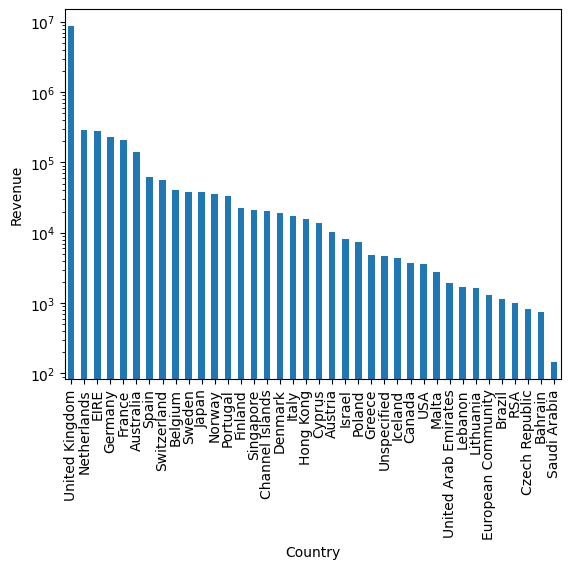

In [62]:
df_rest_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
# plt.title('Bar Plot')
plt.yscale('log')
plt.show()

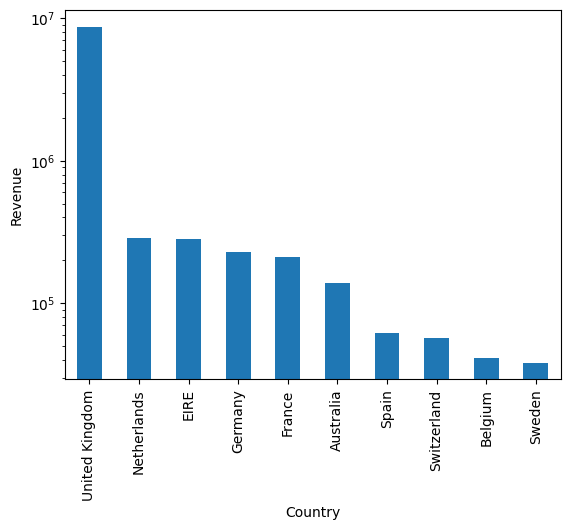

In [63]:
df_rest_country[:10].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
# plt.title('Bar Plot')
plt.yscale('log')
plt.show()

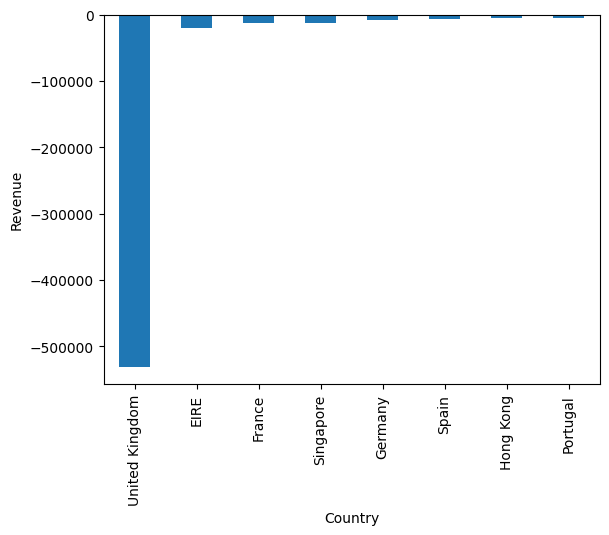

In [64]:
df_cancel_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
# plt.title('Bar Plot')
# plt.yscale('log')
plt.show()

In [65]:
df_rest_customer = df_rest.groupby('CustomerID')['Revenue'].agg('sum').sort_values(ascending=False)[1:11]
df_cancel_customer = df_cancel.groupby('CustomerID')['Revenue'].agg('sum').sort_values(ascending=True)[1:11]

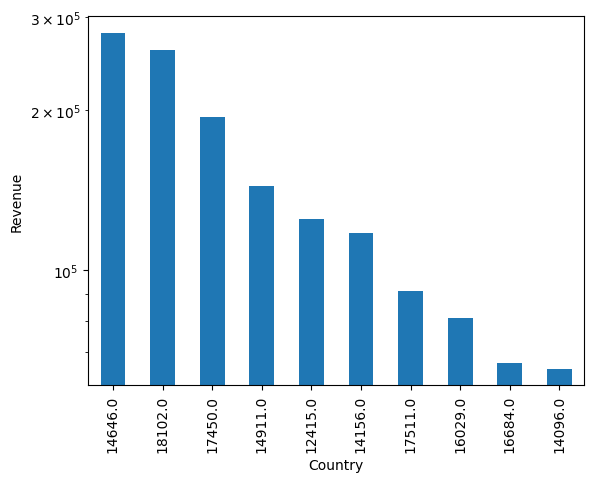

In [66]:
df_rest_customer.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
# plt.title('Bar Plot')
plt.yscale('log')
plt.show()

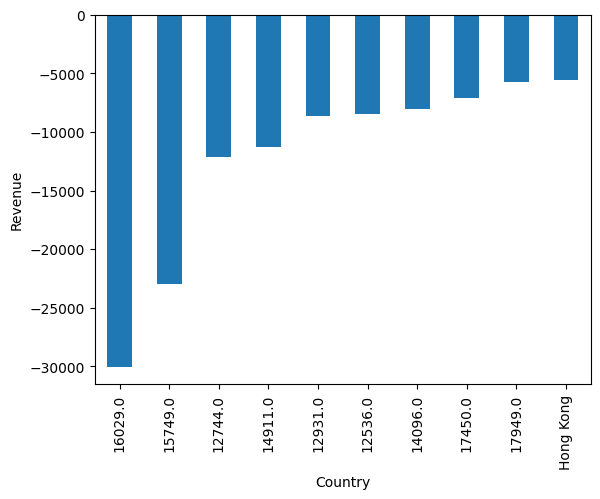

In [67]:
df_cancel_customer.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
# plt.title('Bar Plot')
# plt.yscale('log')
plt.show()